<a href="https://www.arduino.cc/"><img src="https://raw.githubusercontent.com/sandeepmistry/aimldevfest-workshop-2019/master/images/Arduino_logo_R_highquality.png" width=200/></a>
# Tiny ML on Arduino
## Gesture recognition tutorial
 * Sandeep Mistry - Arduino
 * Don Coleman - Chariot Solutions


https://github.com/arduino/ArduinoTensorFlowLiteTutorials/

## Setup Python Environment

The next cell sets up the dependencies in required for the notebook, run it.

In [ ]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow

# Upload Data

1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `punch.csv` and `flex.csv` files from your computer to the tab to upload them into colab.

# Graph Data (optional)

We'll graph the input files on two separate graphs, acceleration and gyroscope, as each data set has different units and scale.

In [ ]:
import pandas as pd

def process_files(file_paths):
    for file_path in file_paths:
        df = pd.read_excel(file_path, header=None, dtype=str)
    return df

# File paths for 'left' and 'right' Excel files
center_paths=['/content/sample_data/0528_center.xlsx']
left_paths = ['/content/sample_data/0528_left.xlsx']
right_paths =['/content/sample_data/0528_right.xlsx']

# Process files
final_result1 = process_files(left_paths)
final_result2 = process_files(right_paths)
final_result3 = process_files(center_paths)

# Print outputs to verify
print(final_result1)
print(final_result2)
print(final_result3)


         0
0     0.29
1    -4.79
2     7.92
3    -1.27
4    -0.59
..     ...
215  -3.42
216   0.78
217   2.74
218  -0.78
219      0

[220 rows x 1 columns]
         0
0     4.69
1    -4.59
2     3.42
3     3.13
4     3.52
..     ...
215    0.2
216   2.93
217  -5.77
218   1.56
219  -1.08

[220 rows x 1 columns]
         0
0      0.1
1    -0.49
2     0.49
3      0.2
4    -0.29
..     ...
215   -0.1
216  -0.98
217  -0.29
218   0.39
219    1.3

[220 rows x 1 columns]


# Train Neural Network





## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the fully connected neural network.

Update the `GESTURES` list with the gesture data you've collected in `.csv` format.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Set a fixed random seed value, for reproducibility
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# List of gestures that data is available for
EOG = ["left", "right","center"]
NUM_EOG = len(EOG)
SAMPLES_PER_EOG = 5
# Create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_EOG = np.eye(NUM_EOG)
print(ONE_HOT_ENCODED_EOG)

inputs = []
outputs = []

# 가정: data_frames는 각 EOG 유형에 대한 데이터프레임을 포함하고 있는 리스트
data_frames = [final_result1, final_result2,final_result3]  # 예시로 final_result1과 final_result2가 각각 left, right 데이터를 담고 있다고 가정

for eog_index in range(NUM_EOG):
  eog = EOG[eog_index]
  print(f"Processing index {eog_index} for eog '{eog}'.")

  df = data_frames[eog_index]  # 각 EOG 유형에 맞는 데이터프레임 할당
  num_recordings = len(df) // SAMPLES_PER_EOG  # 데이터프레임에서 EOG 녹음 수 계산

  print(f"\tThere are {num_recordings} recordings of the {eog} eog.")

  # 데이터프레임에서 적절한 세그먼트 추출
  for n in range(num_recordings):
      segment = df.iloc[n * SAMPLES_PER_EOG:(n + 1) * SAMPLES_PER_EOG]
      if len(segment) == SAMPLES_PER_EOG:
          inputs.append(segment.values.flatten())  # 세그먼트를 1차원 배열로 변환하여 입력 목록에 추가
          outputs.append(ONE_HOT_ENCODED_EOG[eog_index])  # 해당 EOG 유형에 대한 원-핫 인코딩된 출력 추가

# 리스트를 numpy 배열로 변환
inputs = np.array(inputs)
outputs = np.array(outputs)
print(inputs)
print(outputs)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Processing index 0 for eog 'left'.
	There are 44 recordings of the left eog.
Processing index 1 for eog 'right'.
	There are 44 recordings of the right eog.
Processing index 2 for eog 'center'.
	There are 44 recordings of the center eog.
[['0.29' '-4.79' '7.92' '-1.27' '-0.59']
 ['-4.59' '7.04' '-0.59' '-0.98' '-0.78']
 ['-4.5' '6.65' '-1.37' '-0.29' '0.59']
 ['-1.08' '-4.5' '5.18' '-0.39' '-0.1']
 ['-1.27' '-2.83' '5.67' '-2.25' '0.1']
 ['0.68' '-4.01' '6.26' '-0.98' '-0.49']
 ['-4.69' '6.65' '-0.88' '-0.59' '-0.2']
 ['-4.2' '5.47' '-0.59' '-0.49' '-0.49']
 ['-5.08' '6.26' '-0.39' '-1.08' '-0.39']
 ['-3.71' '5.47' '-0.59' '-0.29' '-0.29']
 ['-6.84' '4.4' '3.32' '-0.59' '-0.29']
 ['-0.68' '-4.89' '6.06' '-0.29' '-0.29']
 ['-3.62' '5.08' '0.1' '-0.1' '-0.39']
 ['-3.71' '5.18' '-1.08' '-0.59' '-0.49']
 ['-3.42' '5.08' '-0.39' '-0.49' '0']
 ['-4.01' '5.38' '-0.88' '-0.39' '-0.39']
 ['-3.91' '5.57' '-1.27' '-0.39' '-0.39']
 ['-3.71' '4.89' '-0.39' '0' '-

## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터 타입 확인 및 변환
inputs = np.array(inputs).astype(float)  # inputs를 float 타입으로 명시적 변환
outputs = np.array(outputs).astype(float)  # outputs도 float 타입으로 명시적 변환

# 데이터 섞기 전 인덱스 생성
indices = np.arange(inputs.shape[0])
np.random.shuffle(indices)

# 인덱스를 사용하여 입력과 출력 데이터 섞기
inputs = inputs[indices]
outputs = outputs[indices]

# 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(NUM_EOG, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# 데이터 세트 분할 및 모델 훈련
num_inputs = len(inputs)
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)
inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

# 모델 훈련
history = model.fit(
    inputs_train, outputs_train,
    epochs=600,
    batch_size=1,
    validation_data=(inputs_validate, outputs_validate)
)



Epoch 1/600
79/79 [==============================] - 1s 9ms/step - loss: 0.1394 - mae: 0.2806 - val_loss: 0.1165 - val_mae: 0.2416
Epoch 2/600
79/79 [==============================] - 1s 6ms/step - loss: 0.1079 - mae: 0.2262 - val_loss: 0.1034 - val_mae: 0.2131
Epoch 3/600
79/79 [==============================] - 1s 10ms/step - loss: 0.0940 - mae: 0.1958 - val_loss: 0.0945 - val_mae: 0.1958
Epoch 4/600
79/79 [==============================] - 1s 7ms/step - loss: 0.0829 - mae: 0.1798 - val_loss: 0.0863 - val_mae: 0.1873
Epoch 5/600
79/79 [==============================] - 1s 7ms/step - loss: 0.0710 - mae: 0.1682 - val_loss: 0.0820 - val_mae: 0.1804
Epoch 6/600
79/79 [==============================] - 1s 10ms/step - loss: 0.0563 - mae: 0.1447 - val_loss: 0.0763 - val_mae: 0.1615
Epoch 7/600
79/79 [==============================] - 1s 9ms/step - loss: 0.0471 - mae: 0.1293 - val_loss: 0.0723 - val_mae: 0.1500
Epoch 8/600
79/79 [==============================] - 1s 8ms/step - loss: 0.0413 -

## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

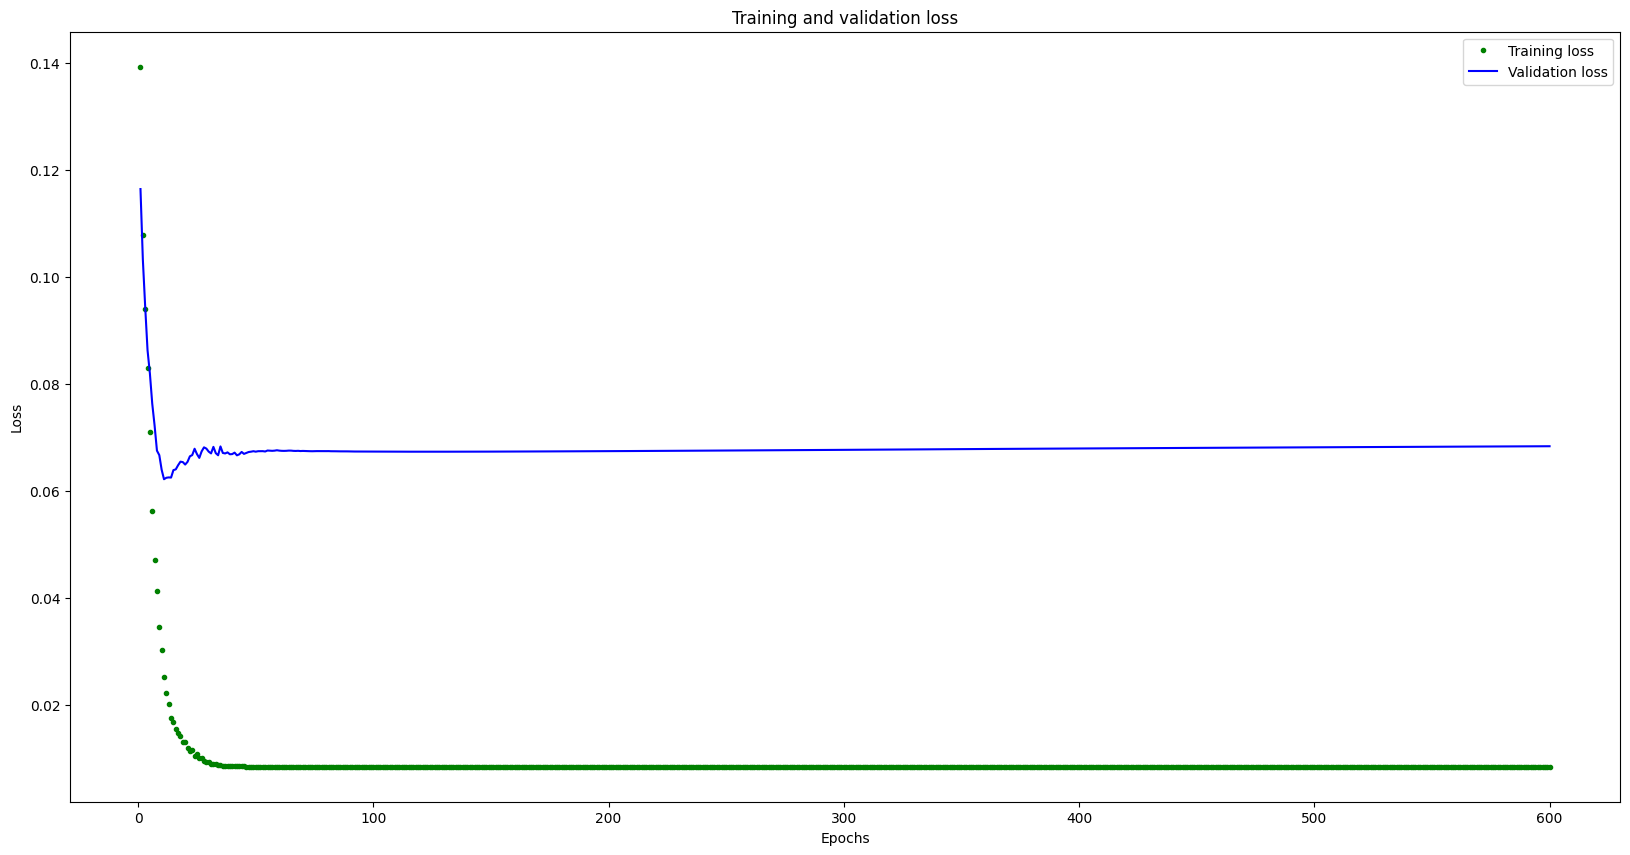

[20.0, 10.0]


In [ ]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

## Verify

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

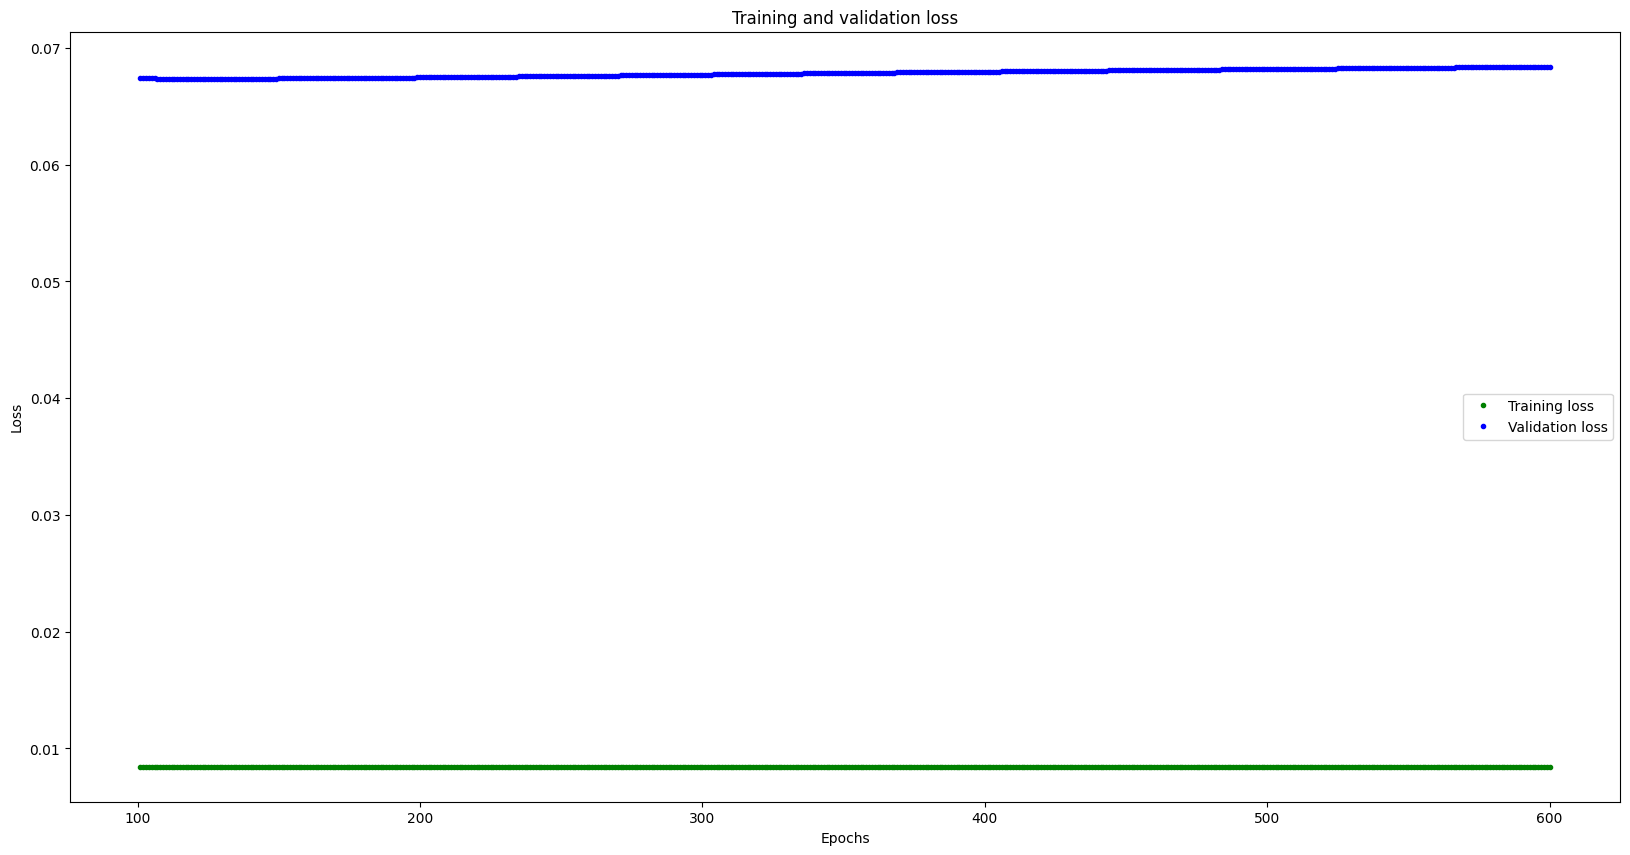

In [ ]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



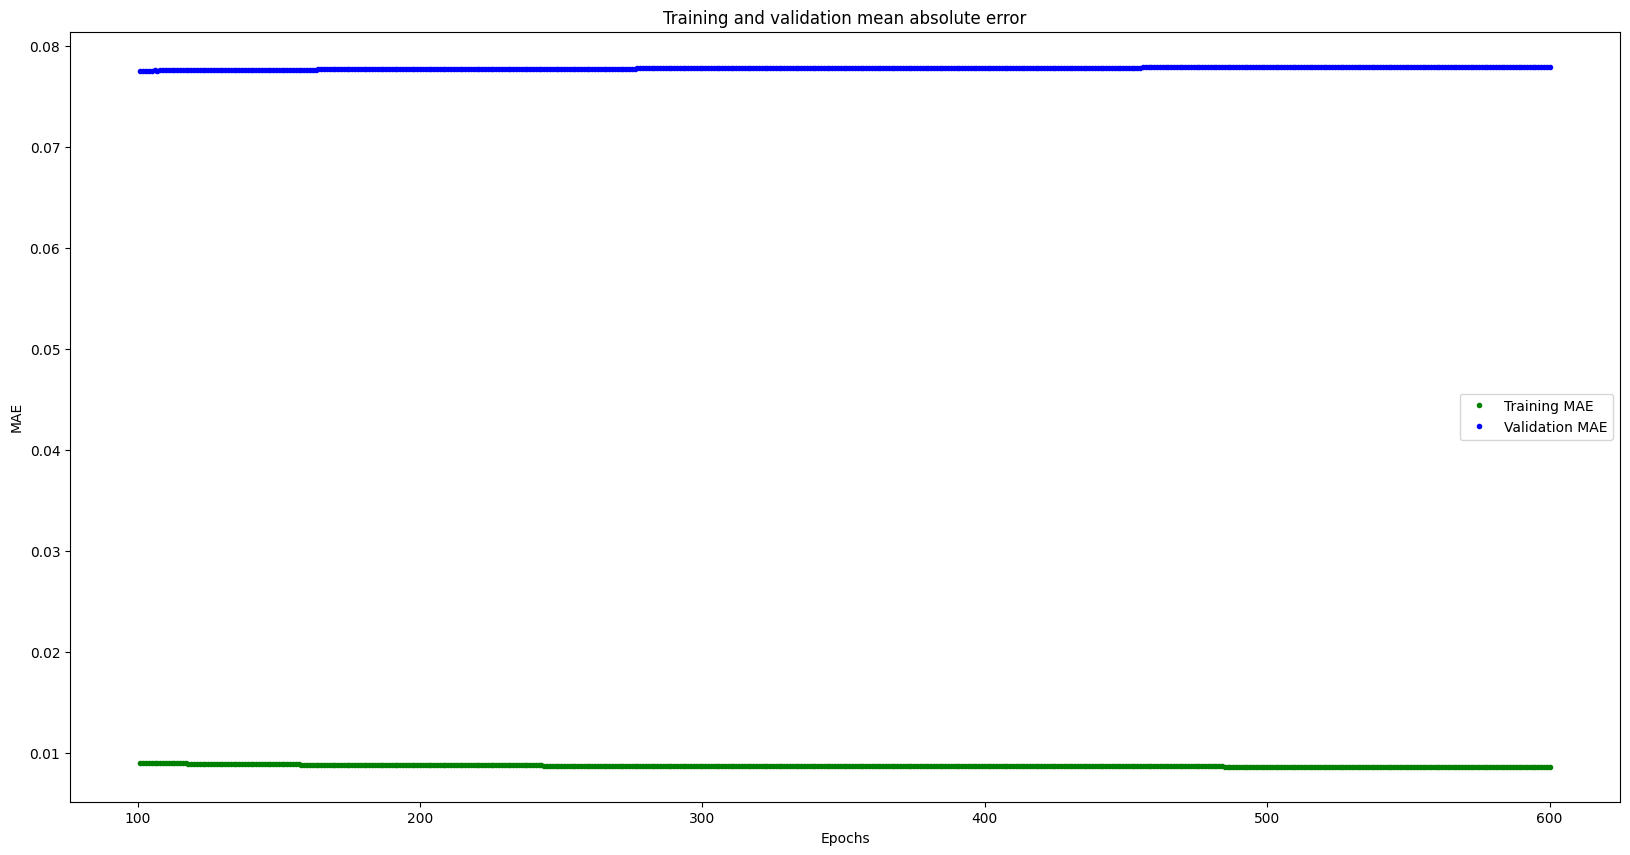

In [ ]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data
Put our test data into the model and plot the predictions


1/1 [==============================] - 0s 192ms/step


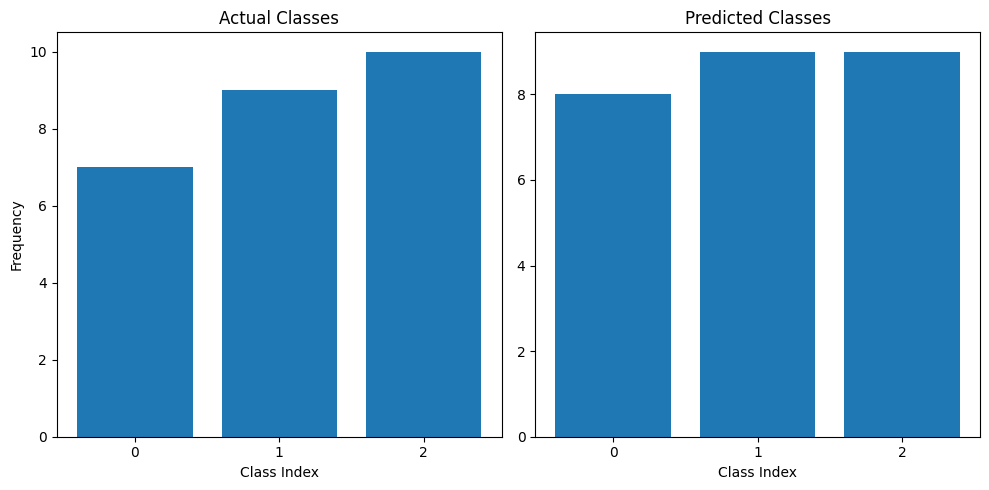

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(inputs_test)
# 예측된 클래스 인덱스 추출
predicted_classes = np.argmax(predictions, axis=1)
# 실제 클래스 인덱스 추출
actual_classes = np.argmax(outputs_test, axis=1)

# 예측과 실제 결과 비교를 위한 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Actual Classes')
plt.hist(actual_classes, bins=np.arange(NUM_EOG + 1) - 0.5, rwidth=0.8)
plt.xticks(np.arange(NUM_EOG))
plt.xlabel('Class Index')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Predicted Classes')
plt.hist(predicted_classes, bins=np.arange(NUM_EOG + 1) - 0.5, rwidth=0.8)
plt.xticks(np.arange(NUM_EOG))
plt.xlabel('Class Index')

plt.tight_layout()
plt.show()

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("Eog_model1.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("Eog_model1.tflite")
print("Model is %d bytes" % basic_model_size)



Model is 6544 bytes


## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [ ]:
!echo "const unsigned char model[] = {" > /content/Eog_model1.h
!cat Eog_model1.tflite | xxd -i      >> /content/Eog_model1.h
!echo "};"                              >> /content/Eog_model1.h

import os
model_h_size = os.path.getsize("Eog_model1.h")
print(f"Header file, Eog_model1.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click Eog_model.h to download the file.")

Header file, Eog_model1.h, is 40,390 bytes.

Open the side panel (refresh if needed). Double click Eog_model.h to download the file.


# Classifying IMU Data

Now it's time to switch back to the tutorial instructions and run our new model on the Arduino Nano 33 BLE Sense to classify the accelerometer and gyroscope data.
